# Exploratory Data Analysis (EDA) to understand how the student's performance (test scores) is affected by the
# other variables (Gender, Ethnicity, Parental level of education, Lunch, Test
# preparation course). 

---

Abhishek Ranjan , 120CS0208

**Description**

Gender : Gender of the student

Race/Ethnicity : Race of the student as group A/B/C

Parental level of Education : What is the education Qualification of Students Parent

Lunch : Whether the lunch is Standard type/Free lunch or Some discounted lunch

Test preparation Course : Whether Student has Taken or not and Completed

Math Score: Scores in Maths

Reading Score: Scores in Reading 

Writing Score: Scores in Writing

**What to do in Exploratory Data Analysis**
1. To Analyse insights in the dataset.
2. To understand the connection between the variables and to uncover the
underlying structure
3. To extract the import Variables
4. To detect anomalies
5. To test the underlying assumptions.
6. Provide Insights with Suitable Graphs and Visualisations.
7. Write all your inferences with supporting Analysis and Visualisations.

In [ ]:
#Data Analysis / Data Preprocessing Phase
#First we will import the required libraries and packages in order to perform explicit EDA on our Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn 
from sklearn import preprocessing

In [ ]:
#Importing the StudentPerformance Dataset
df_studentperf = pd.read_csv('/content/StudentsPerformance.csv')

In [ ]:
df_studentperf.head() #head() will display 5 rows of the data set unless and until any integer is passed in it as arguement.

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Google Colab includes an extension that renders pandas dataframes into interactive displays that can be filtered, sorted, and explored dynamically.**

In [ ]:
#Displaying the information of the Data set
df_studentperf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


**Inference from the above Table:**
* Number of columns in the above dataset = 8
* Number of rows = 1000
* No variable column has null/missing values. as *Non -Null Count* is non-null for all variables.
* The test scores (math score  , reading score , writing score) are of integer type .

In [ ]:
df_studentperf.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


**Inference from the table:**
* Performance of students in READING is better than the other two.
* Students have scored 100 as the maximum score in all the three subjects.

The describe() function returns the count, mean, standard deviation, minimum and maximum values.

If Count for  Variable column = No. of rows then we can infer that there is absence of missing values. We can cross check this from the above table.


In [ ]:
df_studentperf.head(25)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [ ]:
#this will help in knowing the number of categories present in each categorical variable
df_studentperf.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
dtype: int64

In [ ]:
#this snippet will display the names of the different variables present in the data set
df_studentperf.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [ ]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in df_studentperf.columns if df_studentperf[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(df_studentperf[feature].isnull().mean(), 4),  ' % missing values')

In the above dataset we can observe **test preparation course** variable/feature takes two values of type object (string):
 


1.   completed
2.   none

So , for our convinience we can convert the categorical values into boolean values , 1 for completed and 0 for none. 
 
  

In [ ]:
# replace the ‘test preparation course' column containing the values 'completed' and 'none'  with 
# True(1) and  False(0):
# df_studentperf['test preparation course'] = df_studentperf['test preparation course'].replace(
#                    {'completed':1 ,'none':0})
df_studentperf

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [ ]:
df_studentperf['test preparation course'] = df_studentperf['test preparation course'].eq('completed').mul(1)

In [ ]:
df_studentperf.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,0,72,72,74
1,female,group C,some college,standard,1,69,90,88
2,female,group B,master's degree,standard,0,90,95,93
3,male,group A,associate's degree,free/reduced,0,47,57,44
4,male,group C,some college,standard,0,76,78,75


**Now with the help of visualizations and graphs we will try to look into the insights of the features  or variables and analyse if they play any significant role in the student's performance**

### Analysis taking subject scores individually into account :

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


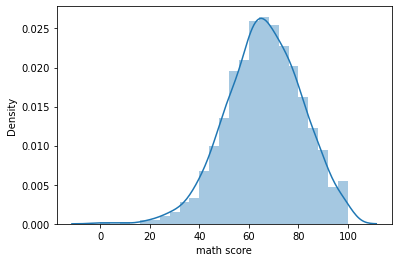

In [ ]:
sns_plot = sns.distplot(df_studentperf["math score"]) #This will show the distribution of "math score" feature.

* **From the above distribution plot we can conclude that maximum students have scored marks between 60-75**

Text(0.5, 1.0, 'Maths Scores')

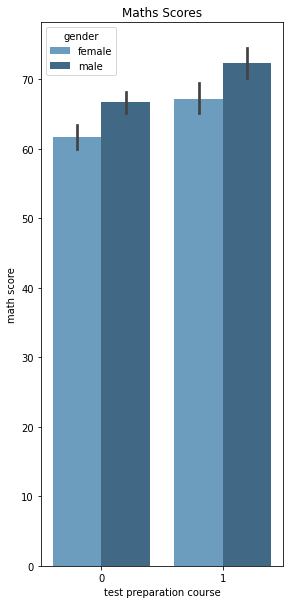

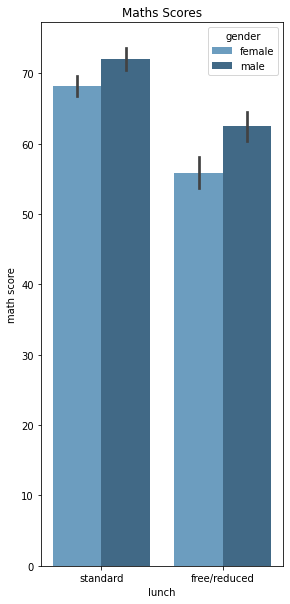

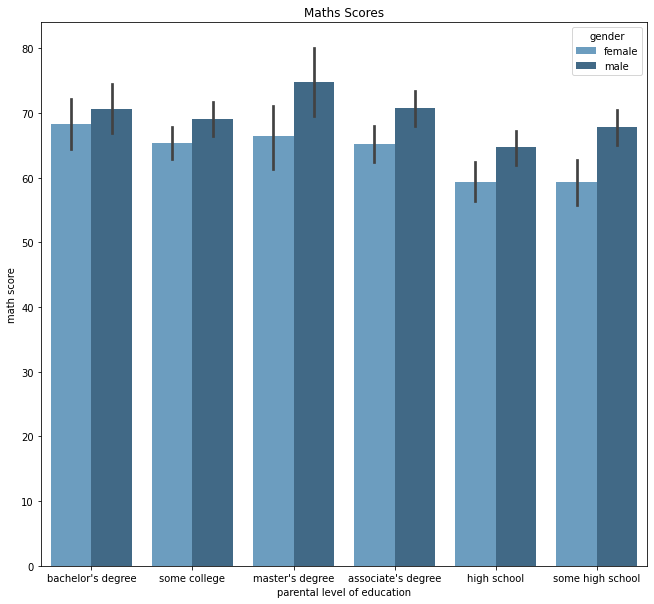

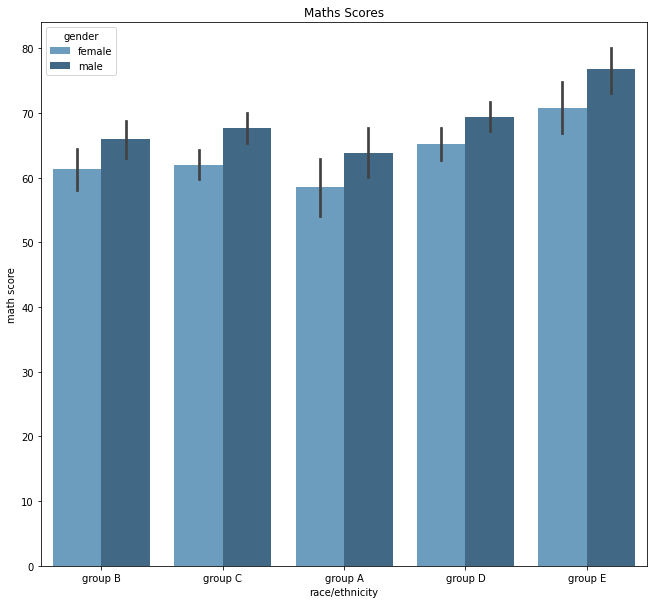

In [ ]:
#Plotting subject test scores against : gender,	race/ethnicity	,parental level of education,	lunch ,	test preparation course	
#to analyse and visualize how they affect the test scores and their interdependence relation.

plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.barplot(x='test preparation course',y='math score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Maths Scores')

plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.barplot(x='lunch',y='math score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Maths Scores')


plt.figure(figsize=(50,10))
plt.subplot(1,4,1)
sns.barplot(x='parental level of education',y='math score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Maths Scores')


plt.figure(figsize=(50,10))
plt.subplot(1,4,1)
sns.barplot(x='race/ethnicity',y='math score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Maths Scores')



**Inference from the above 4 Graphs:**
* From the above graphs , we can infer that Male students have performed better than Female students in Maths subject irrespective of the other factors.
* Graph 1 shows that Students who completed the Test Preparation course have secured more marks than those who didn't.
* Graph 2 shows that students who had standard Lunch secured more marks than those who didn't .
* Graph 3 shows that students whose Parents had either Bachelor's degree or Master's degree were able to perform better.
* From Graph 4  we can infer that , students who belong to the ethnicity Group E were able to securee more marks than the rest.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


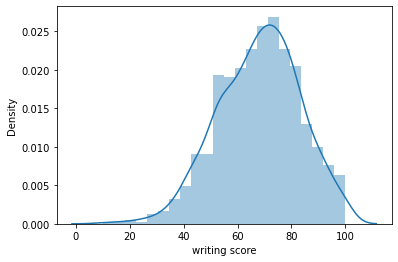

In [ ]:
sns_plot = sns.distplot(df_studentperf["writing score"]) #This code snippet shows the distribution of marks awarded to the students.

**Again here also, we can infer that The marks range for which the Fraction of students is maximum lies between 65-75**

Text(0.5, 1.0, 'Writing Scores')

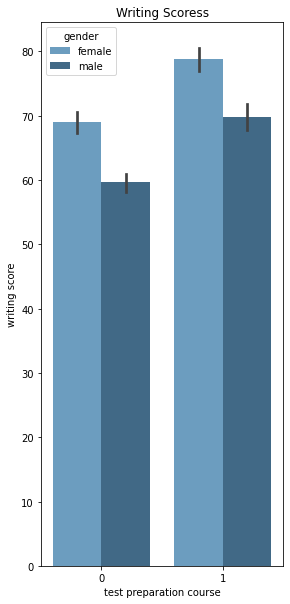

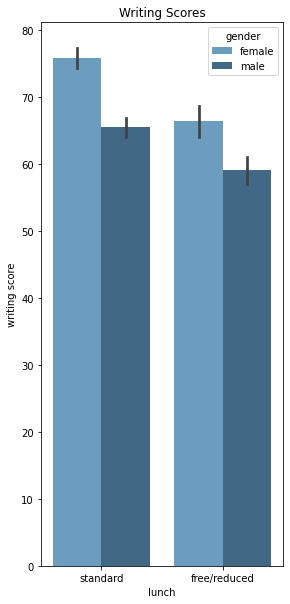

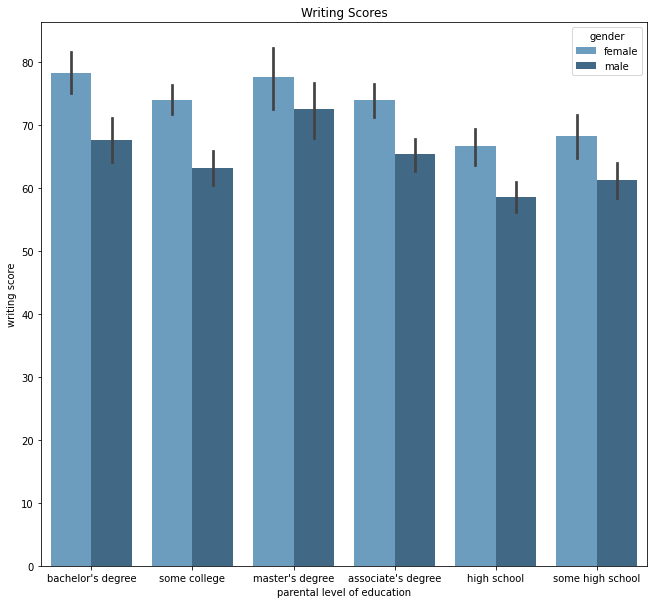

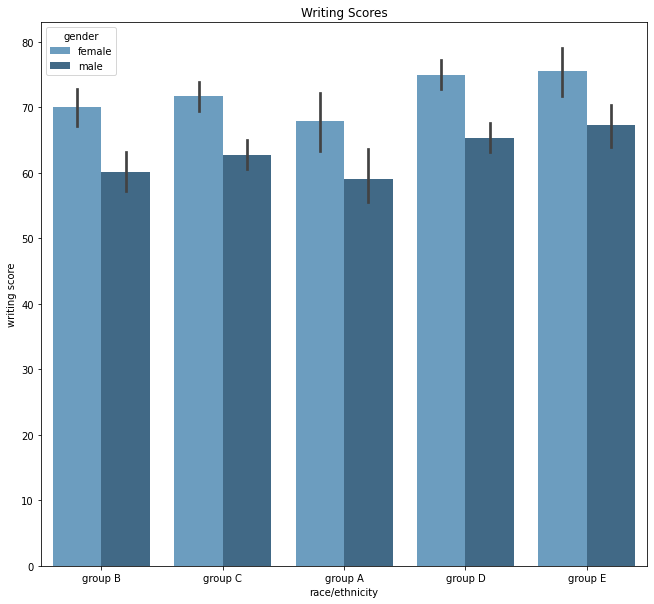

In [ ]:
#Plotting subject test scores(Writing score) against : gender,	race/ethnicity	,parental level of education,	lunch ,	test preparation course	
#to analyse and visualize how they affect the test scores and their interdependence relation.


plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.barplot(x='test preparation course',y='writing score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Writing Scoress')

plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.barplot(x='lunch',y='writing score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Writing Scores')


plt.figure(figsize=(50,10))
plt.subplot(1,4,1)
sns.barplot(x='parental level of education',y='writing score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Writing Scores')


plt.figure(figsize=(50,10))
plt.subplot(1,4,1)
sns.barplot(x='race/ethnicity',y='writing score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Writing Scores')

**Inference from the above 4 Graphs:**
* From the above graphs , we can infer that Female students have performed better than male students in Maths subject irrespective of the other factors.
* Graph 1 shows that Students who completed the Test Preparation course have secured more marks than those who didn't.
* Graph 2 shows that students who had standard Lunch secured more marks than those who didn't .
* Graph 3 shows that students whose Parents had either Bachelor's degree or Master's degree were able to perform better.
* From Graph 4  we can infer that , students who belong to the ethnicity Group E were able to securee more marks than the rest.

Text(0.5, 1.0, 'Reading scores ')

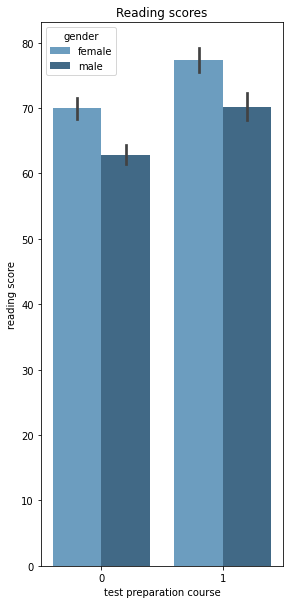

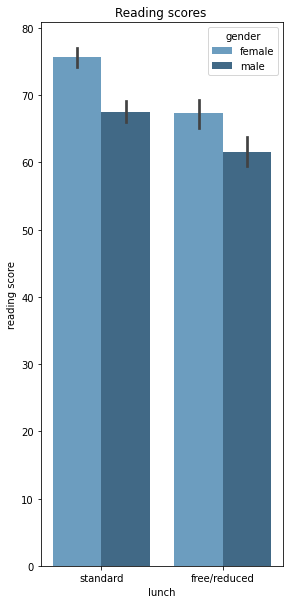

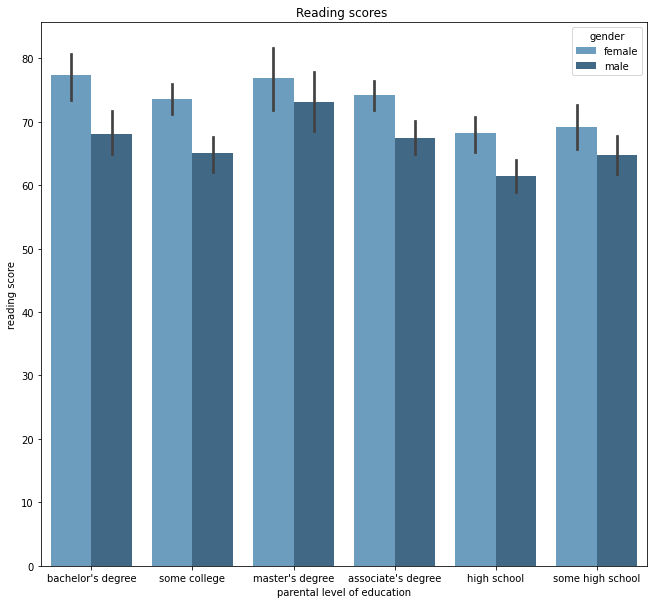

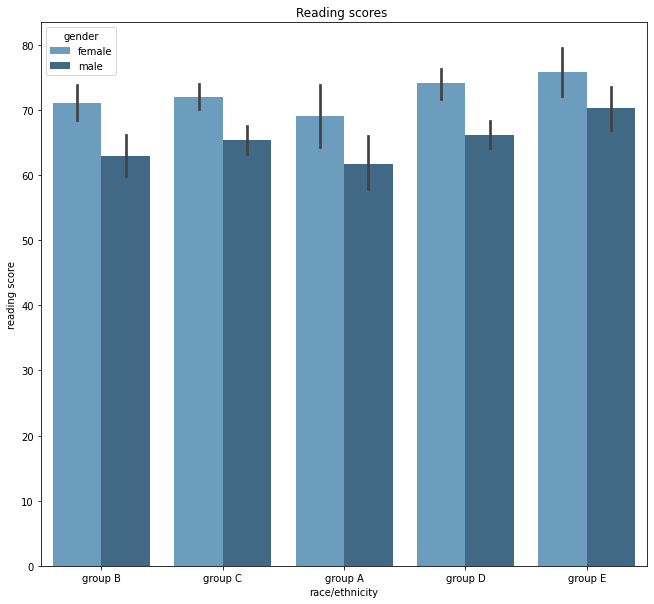

In [ ]:
#Plotting subject test scores(Reading score) against : gender,	race/ethnicity	,parental level of education,	lunch ,	test preparation course	
#to analyse and visualize how they affect the test scores and their interdependence relation.


plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.barplot(x='test preparation course',y='reading score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Reading scores')

plt.figure(figsize=(20,10))
plt.subplot(1,4,1)
sns.barplot(x='lunch',y='reading score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Reading scores ')


plt.figure(figsize=(50,10))
plt.subplot(1,4,1)
sns.barplot(x='parental level of education',y='reading score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Reading scores ')


plt.figure(figsize=(50,10))
plt.subplot(1,4,1)
sns.barplot(x='race/ethnicity',y='reading score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Reading scores ')

**Inference from the above 4 Graphs:**
* From the above graphs , we can infer that Female students have performed better than male students in Maths subject irrespective of the other factors.
* Graph 1 shows that Students who completed the Test Preparation course have secured more marks than those who didn't.
* Graph 2 shows that students who had standard Lunch secured more marks than those who didn't .
* Graph 3 shows that students whose Parents had either Bachelor's degree or Master's degree were able to perform better.
* From Graph 4  we can infer that , students who belong to the ethnicity Group E were able to securee more marks than the rest.

## The above graphs can also be plotted categorically to evaluate which gender performs better.For eg.
* Plotting lunch against the maths,reading and writing scores to see which gender perfroms better
* Plotting test preparation scores against the maths,reading and writing scores to see which gender perfroms better
* Plotting race/ethnicity against the maths,reading and writing scores to see which gender perfroms better

**Case 1: Plotting test preparation scores against the maths,reading and writing scores to see which gender perfroms better** 

---



---



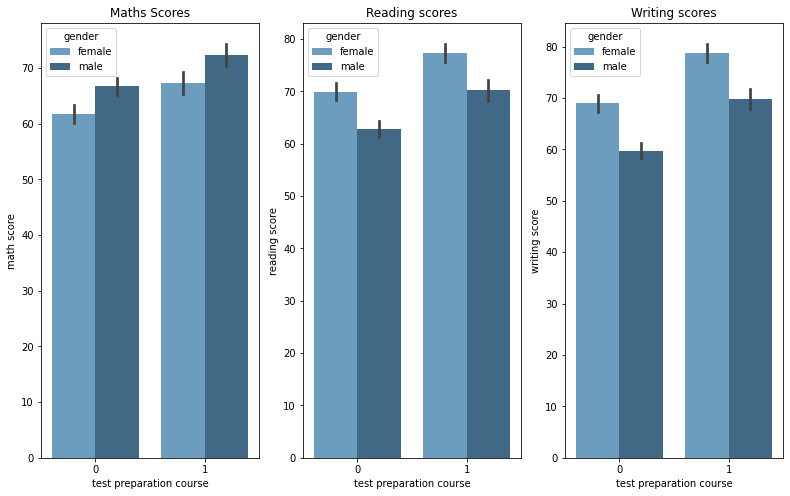

In [ ]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
sns.barplot(x='test preparation course',y='math score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Maths Scores')

plt.subplot(1, 4, 2)
sns.barplot(x='test preparation course',y='reading score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Reading scores')

plt.subplot(1, 4, 3)
sns.barplot(x='test preparation course',y='writing score',data=df_studentperf,hue='gender',palette="Blues_d")
plt.title('Writing scores')
plt.show()

Now , we will look into some more visulaizations and graphs for better comparisons and conclusions.

**Comparing Parental level of education with Test scores in all the three subjects**

---



---



In [ ]:
#Number of students whose parents have Different Parental level of education
df_studentperf['parental level of education'].value_counts()


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

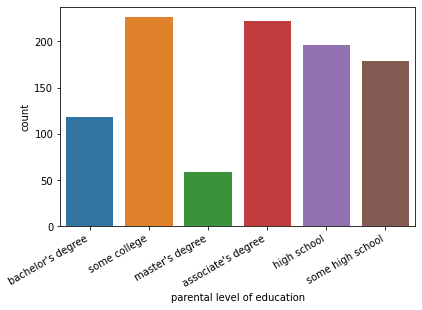

In [ ]:
#plotting a graph with parental level of education against count to see how important is parent's education
fig,ax=plt.subplots()
sns.countplot(x='parental level of education',data=df_studentperf)
plt.tight_layout()
fig.autofmt_xdate()

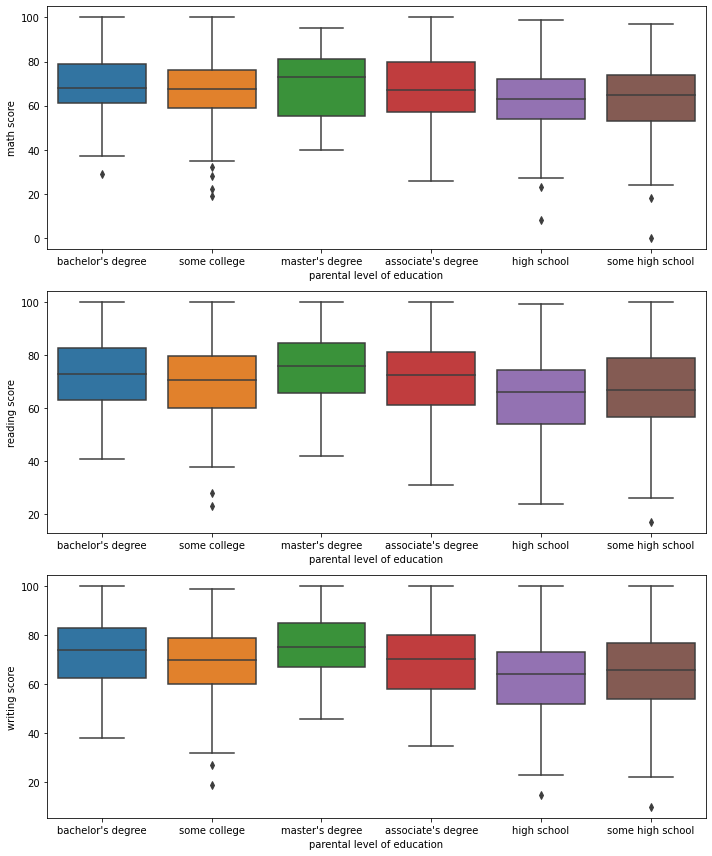

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(10,12))
#Math
sns.boxplot(x=df_studentperf['parental level of education'],y=df_studentperf['math score'],ax=ax[0])
#Reading
sns.boxplot(x=df_studentperf['parental level of education'],y=df_studentperf['reading score'],ax=ax[1])
#Writing
sns.boxplot(x=df_studentperf['parental level of education'],y=df_studentperf['writing score'],ax=ax[2])
plt.tight_layout()



**From the above we can observe that students who parents had Bachelor's degree or Master's degree in their Parental level of education performed better in all the three subject courses.**
* We can also observe that : The higher the parental education level, the better is the score of that student.
* For all the three subjects, the students who have scored the lowest belong to the parents with ‘some high school’ degree.


**Comparing Race/Ethnicity with Test scores in all the three subjects**


---



---



In [ ]:
#number of students belonging to each race/ethnic group
df_studentperf['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

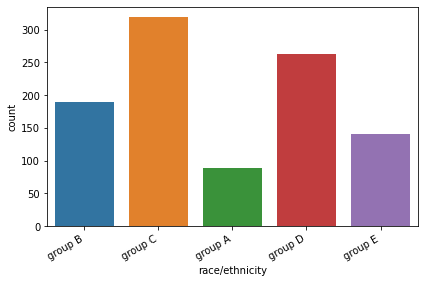

In [ ]:
#plotting a graph with race/ethnicity against count to see how important is ethnicity
fig,ax=plt.subplots()
sns.countplot(x='race/ethnicity',data=df_studentperf)
plt.tight_layout()
fig.autofmt_xdate()

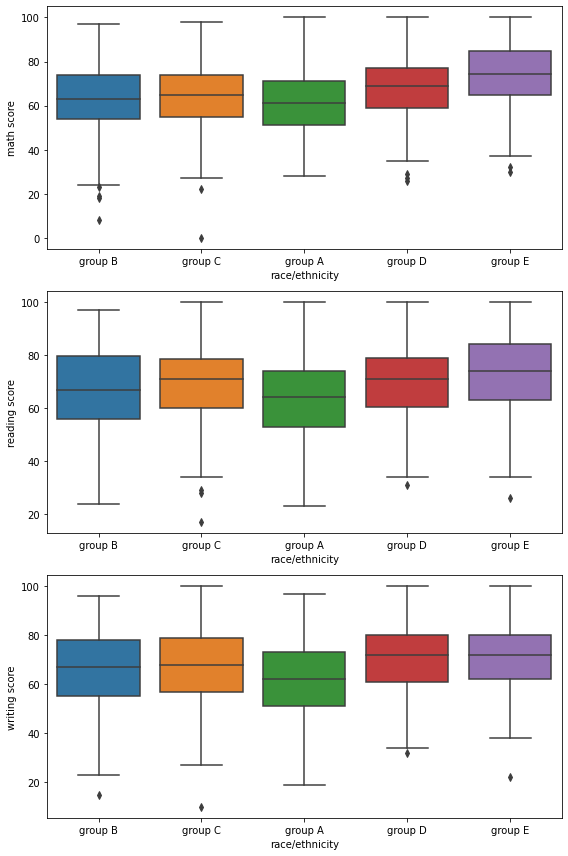

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(8,12))
sns.boxplot(x=df_studentperf['race/ethnicity'],y=df_studentperf['math score'],ax=ax[0])
sns.boxplot(x=df_studentperf['race/ethnicity'],y=df_studentperf['reading score'],ax=ax[1])
sns.boxplot(x=df_studentperf['race/ethnicity'],y=df_studentperf['writing score'],ax=ax[2])
plt.tight_layout()

* **The above observation can also be noted as, 'group A' has a relatively poorer performance in all the three courses whereas in comparison 'group E' performs relatively better than the other groups.**
* Students in group B performed average in all three subjects.


## Now we will try to observe whether there is any corelation between how the students performed in various courses.

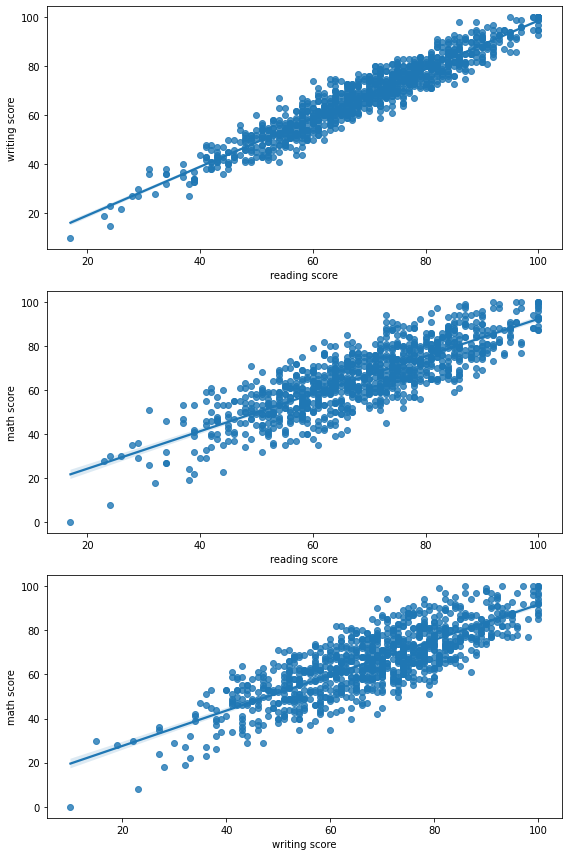

In [ ]:
#plotting a linear regression curve to check the relation
fig, ax = plt.subplots(3,1, figsize=(8,12))
sns.regplot(x=df_studentperf['reading score'],y=df_studentperf['writing score'],ax = ax[0])
sns.regplot(x=df_studentperf['reading score'],y=df_studentperf['math score'],ax = ax[1])
sns.regplot(x=df_studentperf['writing score'],y=df_studentperf['math score'],ax=ax[2])
plt.tight_layout()

**We can infer that there's a strong relation bwtween the scores of different subject course.In order to visualize the corelation in a better way, we produce the Heatmap:**

How to Read the heatmap ?


*   Dark shade represents a positive correlation. 
*   Light color/ white is a towards the negative correlation.
* **The Darker the shade , the stronger the corelation.**




(array([0.5, 1.5, 2.5, 3.5]), <a list of 4 Text major ticklabel objects>)

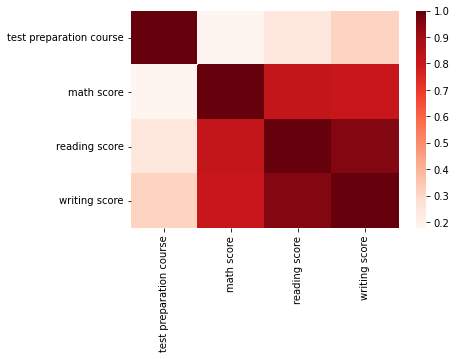

In [ ]:
sns.heatmap(df_studentperf.corr(), cmap ="Reds")
plt.xticks(rotation=90)

We can observe from the above heat-map that there is a strong correlation between 'reading score' and 'writing score'. The 'math score' is also correlated with the 'reading score' and 'writing score'.

# Conclusions:

---




* Overall the students performed better in Reading and Writing than in Mathematics.This can be inferred from the Mean of all the test subject scores and the minimum of the lowest scores obtained in the three subjects was 0 , which was in Maths.
* Males students are better than females students in Mathematics but females are better in Reading and Writing.
* Race/Ethnicity and lunch type also does affect students’ performance
* Parental level of education seems to play a deciding factor in the student’s performance.
* Students who completed their test preparation course did better than those who did not.

